In [3]:
import numpy as np
import tables as PyT
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
f=pd.read_csv('golf_data.csv',parse_dates={'dt':[0]})

In [5]:
n9=f.shape[0]/9

In [12]:
d=np.flipud(np.reshape(f.Score,(n9,9)))
r=np.sum(d,axis=1)
t=np.flipud(np.reshape(f.dt,(n9,9)))
t=t[:,0]

In [7]:
print d.shape, t.shape[0]
print t[0]
print r[0]

(38, 9) 38
2014-09-13T10:04:08.000000000-0400
83


In [30]:
regression = np.polyfit(range(0,n9), r, 1)
r_x, r_y = zip(*((i, i*regression[0] + regression[1]) for i in range(n9)))
regression2 = np.polyfit(range(1,n9), r[1:], 1)
r2_x, r2_y = zip(*((i, i*regression2[0] + regression2[1]) for i in range(n9)))

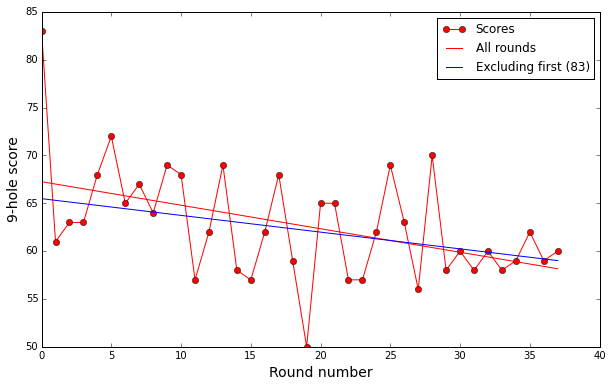

In [34]:
plt.figure(figsize=(10,6))
plt.plot(r,'ro-')
plt.ylabel("9-hole score",fontsize=14)
plt.xlabel("Round number",fontsize=14)
plt.plot(r_x, r_y, color="red")
plt.plot(r2_x, r2_y, color="blue")
lstr=[]
lstr.append('Scores')
lstr.append('All rounds')
lstr.append('Excluding first (83)')
plt.legend(lstr, fontsize=12)